In [1]:
import pandas as pd
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [4]:
# load dataset
np.random.seed(2024)
dataframe = pd.read_csv("HousingData.xls")
dataframe=dataframe.dropna() #dropna() method removes the rows that contains NULL values
dataset = dataframe.values
print(dataset.shape)
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
num=X.shape[0]   #Number of samples
frac=0.15        #test data fraction
test_idx=np.random.choice(range(num), int(num*frac), replace=False)  #test samples selected
train_idx=[i for i in range(num) if i not in test_idx]               #training samples selected
train_X=X[train_idx]
train_Y=Y[train_idx]
test_X=X[test_idx]
test_Y=Y[test_idx]

(394, 14)


In [5]:
print(num)
print(train_X.shape, test_X.shape)

394
(335, 13) (59, 13)


In [6]:
print(train_Y.shape, test_Y.shape)

(335,) (59,)


In [7]:
print(np.any(np.isnan(train_X)))
print(np.any(np.isnan(train_Y)))
print(np.any(np.isnan(test_X)))
print(np.any(np.isnan(test_Y)))


False
False
False
False


In [8]:
model = Sequential()
model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=50, batch_size=10)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 688.9932
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 376.1774
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 145.3201
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 118.6542
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 106.5188
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 95.8878
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 88.2610
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 81.7200
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 76.2862
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 72.0685
Epoch 11/50
34/34 [==============================] - 0s 2ms/step - loss: 69.8959
Epoch 12/50
34/34 [==============================] - 0s 2ms/step - loss: 68.6142
Epoch 13/50
34/34 [=============

In [9]:
loss=model.evaluate(test_X, test_Y)

2/2 [==============================] - 0s 6ms/step - loss: 34.6372


In [10]:
y=model.predict(test_X[0].reshape(1,13))
print(y, test_Y[0])

1/1 [==============================] - 0s 77ms/step
[[25.571945]] 23.8


In [11]:
model = Sequential()
model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=50, batch_size=10)


Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 583.1498
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 580.9681
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 579.4756
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 577.9891
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 576.4902
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 575.0024
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 573.5152
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 572.0329
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 570.5557
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 569.0876
Epoch 11/50
34/34 [==============================] - 0s 2ms/step - loss: 567.6205
Epoch 12/50
34/34 [==============================] - 0s 2ms/step - loss: 566.1500
Epoch 13/50
34/34 [======

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape=(13,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(train_X, train_Y, epochs=50, batch_size=10)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 311.7176
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 133.5251
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 108.3947
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 85.2111
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 73.3051
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 68.8481
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 68.1133
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 64.0785
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 62.1356
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 60.0420
Epoch 11/50
34/34 [==============================] - 0s 2ms/step - loss: 59.4879
Epoch 12/50
34/34 [==============================] - 0s 1ms/step - loss: 58.7430
Epoch 13/50
34/34 [===============

In [14]:
loss=model.evaluate(test_X, test_Y)

2/2 [==============================] - 0s 6ms/step - loss: 27.7198


In [54]:
loss=model.evaluate(test_X, test_Y)
loss=model.predict(test_X)
out = loss[12] - test_Y[12]
print(out)


2/2 [==============================] - 0s 5ms/step
[3.7061749]


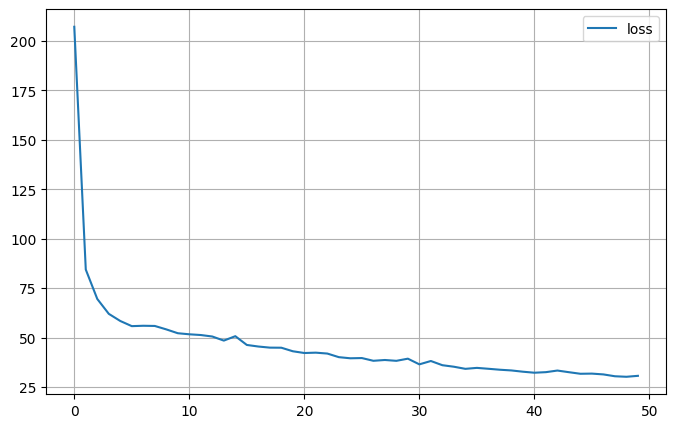

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

